# Stochastic Modeling based on Monte Carlo Method with GBM
## Simulating Stock Data with Geometric Brownian Motion (GBM) - Starter Model
In this project, I am going to simulate stock data for AWS by following the Monte Carlo method and make the assumption that stock prices follow the Geometric Brownian Motion model. Historic stock data will be retrieved from the yfinance library.
$$
dS
t
	​

=μS
t
	​

dt+σS
t
	​

dW
t
	​
$$

where:  
𝑆𝑡: stock price at time 𝑡  
𝜇: drift (expected return)  
𝜎: volatility  
𝑊𝑡: standard Wiener process (Brownian motion)  

These are the assumptions of the Geometric Brownian Motion model:
1. Returns are normally distributed.
2. Prices follow a lognormal distribution.

## Outline
**1. Import Necessary Packages**  
**2. Data Check**  
**3. Exploratory Analysis of AWS Stock Data**  
**4. Simulate Stock Data with GBM**  
**5. Plot Simulated Stock Data**

## Import Necessary Packages

In [1]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8')  # or 'seaborn-darkgrid'
sns.set_palette("husl")

In [2]:
# Fetch AWS (Amazon) stock data for the last 5 years
stock_data = yf.download('AMZN', 
                        start=(datetime.now() - timedelta(days=365*5)).strftime('%Y-%m-%d'),
                        end=datetime.now().strftime('%Y-%m-%d'))

# Sort the data by date in descending order
stock_data = stock_data.sort_index(ascending=False)

# Display first 5 records
print("First 5 records of AWS stock data:")
stock_data.head()

C:\Users\sarah\AppData\Local\Temp\ipykernel_6768\3647759342.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download('AMZN',
[*********************100%***********************]  1 of 1 completed

First 5 records of AWS stock data:


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2025-08-19,228.009995,230.529999,227.119995,230.089996,29833100
2025-08-18,231.490005,231.910004,228.330002,230.229996,25248900
2025-08-15,231.029999,234.080002,229.809998,232.580002,39649200
2025-08-14,230.979996,233.110001,227.020004,227.399994,61545800
2025-08-13,224.559998,224.919998,222.000000,222.000000,36508300


In [3]:
# Display last 5 records
print("Earliest 5 records of AWS stock data:")
stock_data.tail()

Earliest 5 records of AWS stock data:


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2020-08-27,170.000000,172.649994,168.899994,172.502502,85296000
2020-08-26,172.092499,172.587006,167.228500,167.555496,130174000
2020-08-25,167.324493,167.869995,163.350006,164.749496,79856000
2020-08-24,165.373001,169.016006,162.878006,165.507507,93326000
2020-08-21,164.235992,165.720001,163.769501,164.750000,71518000


In [4]:
# Get stock data data frame shape
print("Shape of AWS stock data:", stock_data.shape)

Shape of AWS stock data: (1254, 5)


In [5]:
# Check for missing values
print("Missing values in AWS stock data:")
print(stock_data.isnull().sum())

Missing values in AWS stock data:
Price   Ticker
Close   AMZN      0
High    AMZN      0
Low     AMZN      0
Open    AMZN      0
Volume  AMZN      0
dtype: int64


In [6]:
# Display days of the week
print("Days of the week in AWS stock data:")
print(stock_data.index.day_name().unique())

Days of the week in AWS stock data:
Index(['Tuesday', 'Monday', 'Friday', 'Thursday', 'Wednesday'], dtype='object', name='Date')


## Exploratory Analysis of AWS Stock Data
Next, I will plot the daily closing, high, and low prices in a line chart.

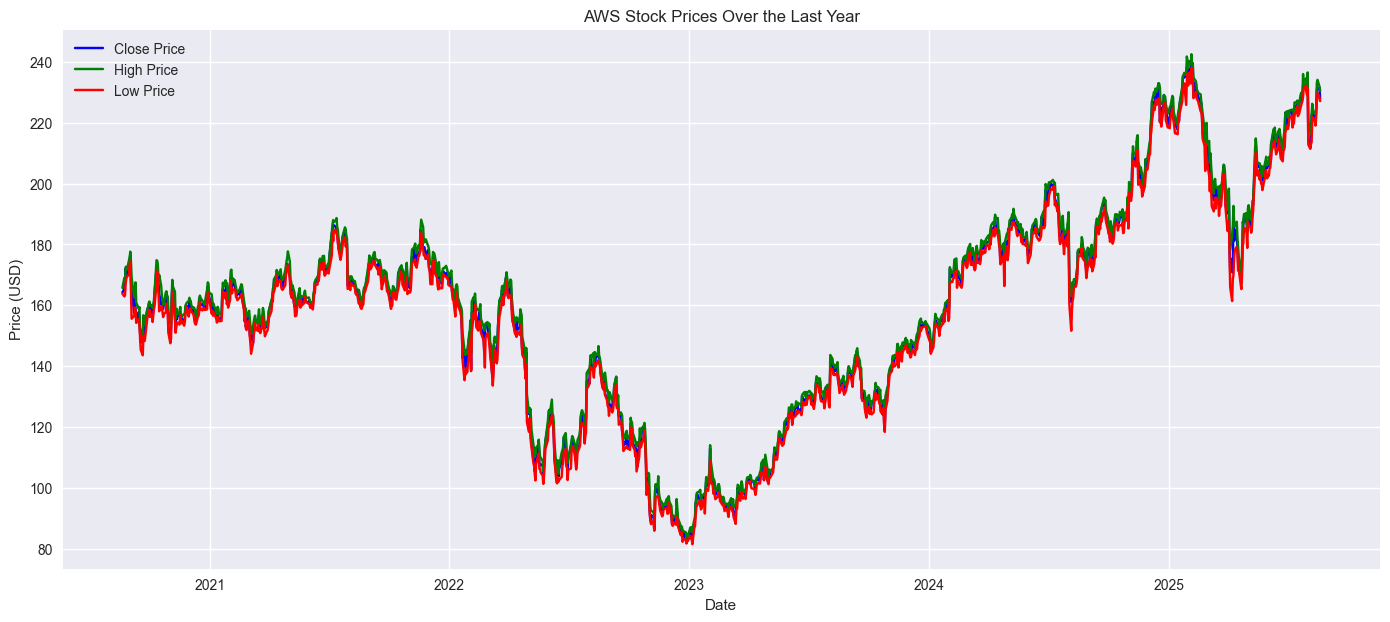

In [8]:
# Plot the daily closing, high, and low prices in a line chart
plt.figure(figsize=(17, 7))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data.index, stock_data['High'], label='High Price', color='green')
plt.plot(stock_data.index, stock_data['Low'], label='Low Price', color='red')
plt.title('AWS Stock Prices Over the Last Year')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

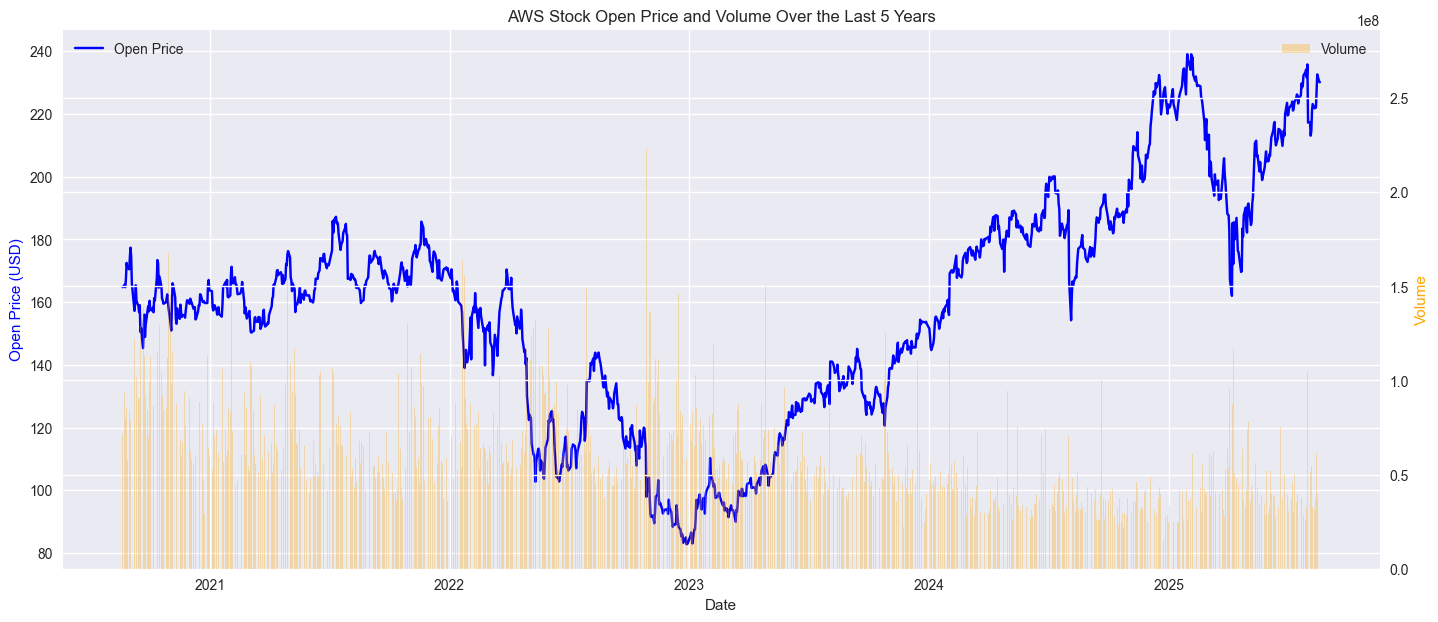

In [9]:
# Plot Open and Volume side by side in a line chart
fig, ax1 = plt.subplots(figsize=(17, 7))
ax2 = ax1.twinx()  # Create a second y-axis for volume
ax1.plot(stock_data.index, stock_data[('Open', 'AMZN')], label='Open Price', color='blue')
ax2.bar(stock_data.index, stock_data[('Volume', 'AMZN')], label='Volume', color='orange', alpha=0.3)
ax1.set_xlabel('Date')
ax1.set_ylabel('Open Price (USD)', color='blue')
ax2.set_ylabel('Volume', color='orange')
ax1.set_title('AWS Stock Open Price and Volume Over the Last 5 Years')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

## Simulate Stock Data with GBM
In this next step, I am setting up the parameters for the GBM.

In [21]:
# Calculate parameters for GBM
# Get the closing prices
close_prices = stock_data[('Close', 'AMZN')].values
# Calculate daily returns
daily_returns = np.log(close_prices[1:] / close_prices[:-1])

# Calculate drift and volatility
drift = np.mean(daily_returns)
volatility = np.std(daily_returns)

# Set simulation parameters
days = 260  # 1 year (approximately 260 trading days)
num_simulations = 1000
S0 = close_prices[0]  # Latest closing price

In [22]:
# Generate predictions using GBM
dt = 1  # time step (1 day)
timestamps = np.arange(0, days, dt)

# Generate random walks
Z = np.random.normal(size=(num_simulations, len(timestamps)))
daily_returns = np.exp((drift - volatility**2/2)*dt + volatility*np.sqrt(dt)*Z)

In [23]:
# Calculate price paths
price_paths = np.zeros_like(daily_returns)
price_paths[:, 0] = S0
for t in range(1, len(timestamps)):
    price_paths[:, t] = price_paths[:, t-1] * daily_returns[:, t]

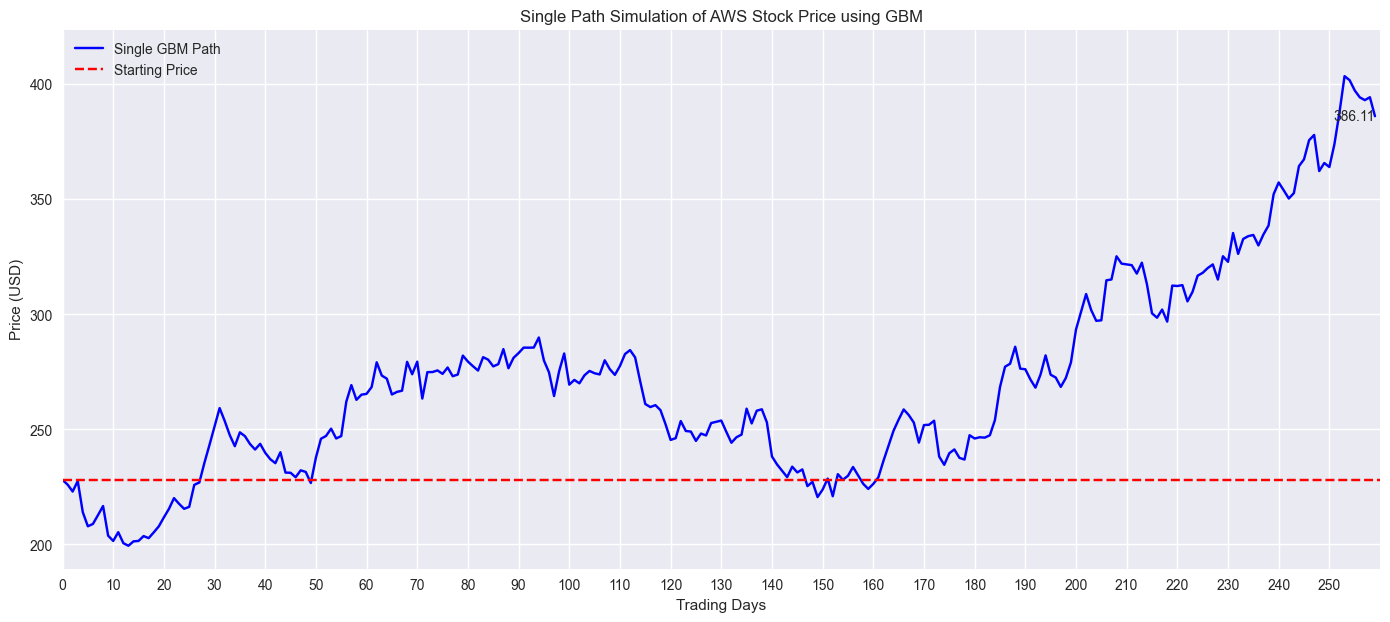

In [24]:
# Plot a single GBM path
plt.figure(figsize=(17, 7))
plt.plot(timestamps, price_paths[0], 'b-', label='Single GBM Path')
plt.axhline(y=S0, color='r', linestyle='--', label='Starting Price')
plt.title('Single Path Simulation of AWS Stock Price using GBM')
plt.xlabel('Trading Days')
plt.ylabel('Price (USD)')
plt.xticks(timestamps[::10])  # Show every 10th day
plt.xlim(0, days)
plt.ylim(min(price_paths[0]) * 0.95, max(price_paths[0]) * 1.05)
plt.text(days - 1, price_paths[0, -1], f'{price_paths[0, -1]:.2f}', fontsize=10, ha='right', va='center')
plt.legend()
plt.grid(True)
plt.show()

## Plot Simulated Stock Data
Below, I will overlay 50 sample paths on top of the 90% confidence interval.

In [25]:
# Calculate percentiles for confidence intervals
low_percentile = 5
high_percentile = 95
mean_path = np.mean(price_paths, axis=0)
low_path = np.percentile(price_paths, low_percentile, axis=0)
high_path = np.percentile(price_paths, high_percentile, axis=0)

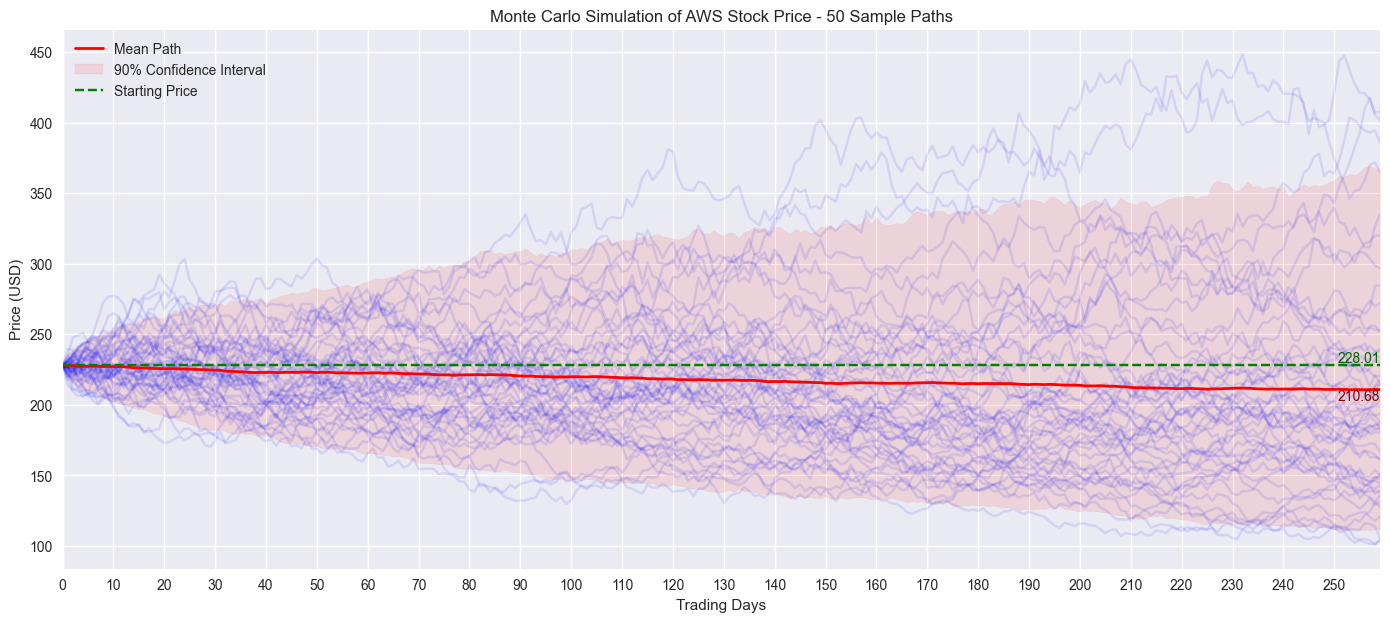

In [33]:
# Plot multiple GBM paths
plt.figure(figsize=(17, 7))
num_paths_to_plot = 50

# Plot sample paths
for i in range(num_paths_to_plot):
    plt.plot(timestamps, price_paths[i], alpha=0.1, color='blue')

# Plot mean path and confidence interval
plt.plot(timestamps, mean_path, 'r-', label='Mean Path', linewidth=2)
plt.fill_between(timestamps, low_path, high_path, color='red', alpha=0.1, 
                 label=f'{high_percentile-low_percentile}% Confidence Interval')

# Add starting price label
plt.text(days - 1, S0, f'{S0:.2f}', fontsize=10, ha='right', va='bottom', color='darkgreen')

# Add data label on day 260 to mean path
plt.text(days - 1, mean_path[-1], f'{mean_path[-1]:.2f}', fontsize=10, ha='right', va='top', color='darkred')

plt.title(f'Monte Carlo Simulation of AWS Stock Price - {num_paths_to_plot} Sample Paths')
plt.xlabel('Trading Days')
plt.ylabel('Price (USD)')
plt.axhline(y=S0, color='green', linestyle='--', label='Starting Price')
plt.xticks(timestamps[::10])
plt.xlim(0, len(timestamps)-1)
plt.legend()
plt.grid(True)
plt.show()

## Discussion and Conlusion
Based on the 5-year historical stock data for AWS, stock prices are likely to decrease by approximately $17.33. This conclusion assumes that returns are normally distributed and that prices follow a lognormal distribution, which is a simplified model. To generate a more realistic simulation, the next step is to incorporate more advanced models such as the Heston volatility model or the jump-diffusion into the Monte Carlo method.